In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ipynb PRACTICE/Logistic Regression dts (Titanic)/train.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.drop(['PassengerId','Name','Ticket'], axis=1, inplace=True)

In [ ]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


* **pclass**: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower
* **age**: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5
* **sibsp**: The dataset defines family relations in this way:
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)
* **parch**: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.
* cabin number
* embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

#Exploration

Text(0.5, 1.0, 'Survived?')

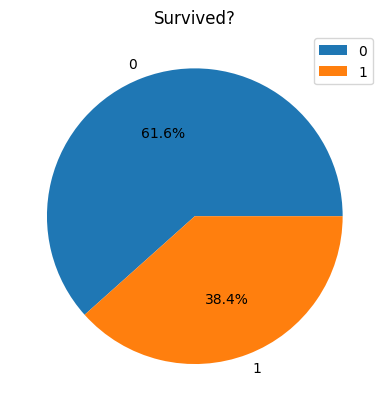

In [ ]:
df.groupby('Survived').size().plot(kind='pie',autopct='%1.1f%%')
plt.legend()
plt.title('Survived?')

In [ ]:
survived = df[df['Survived']==1]
not_survived = df[df['Survived']==0]

Text(0.5, 1.0, 'Gender who survived')

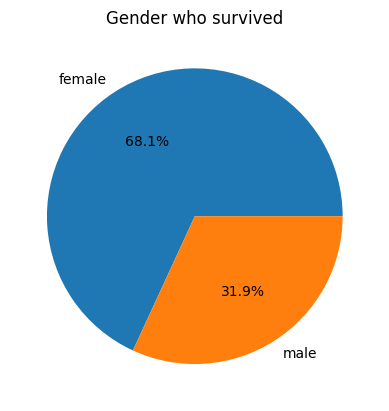

In [ ]:
survived.groupby('Sex').size().plot(kind='pie',autopct='%1.1f%%')
plt.title('Gender who survived')

Text(0.5, 1.0, 'Gender who survived')

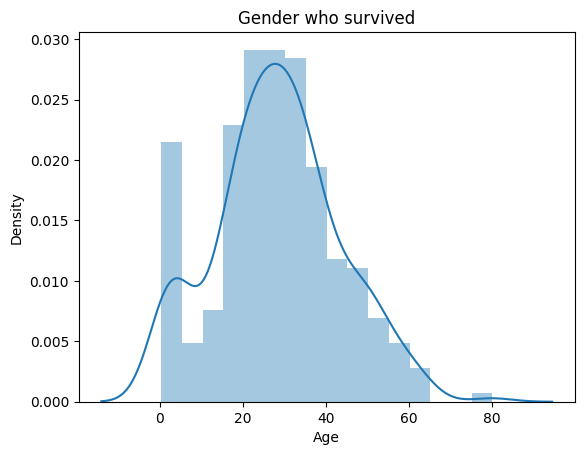

In [ ]:
sns.distplot(survived['Age'],kde=True)
plt.title('Gender who survived')

#Logistic Regression (sklearn)

y = 0 or 1 to describe the person survived or not



x= age to describe at which age that the person have safe percentage of survive

In [ ]:
df['Age'].isna().any()
df.dropna(subset=['Age'],inplace=True)

In [ ]:
x_train = df['Age'].values
y_train = df['Survived'].values

x_train = x_train.reshape(-1, 1)
y_train = y_train.reshape(-1,1)

In [ ]:
lr = LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [ ]:
#make prediction
y_pred = lr.predict(x_train)

In [ ]:
#calculate accuracy
print("Accuracy on training set:", lr.score(x_train, y_train))

Accuracy on training set: 0.5938375350140056


# Logistic Regression

##Scatter plot

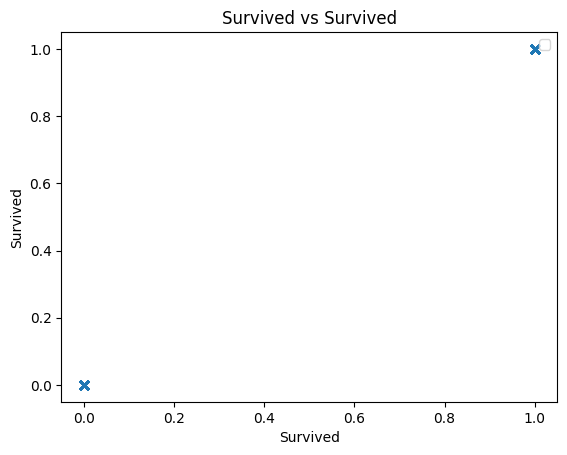

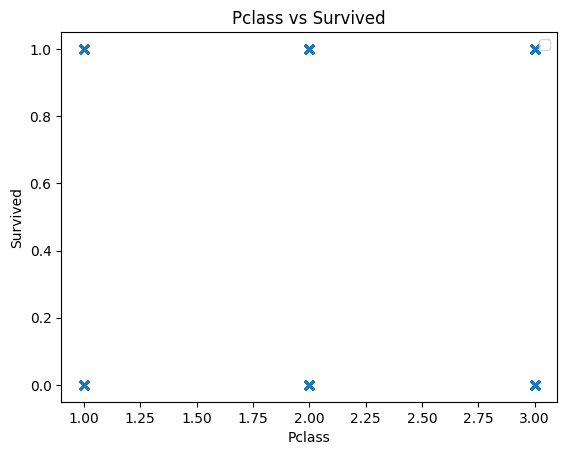

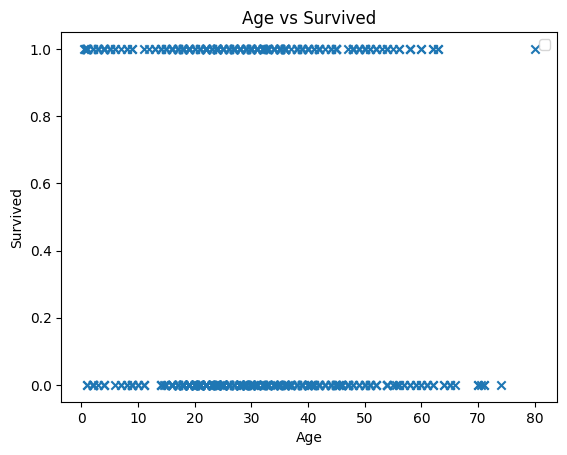

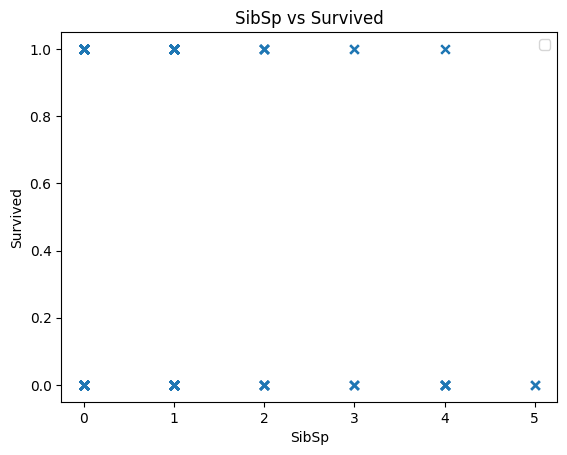

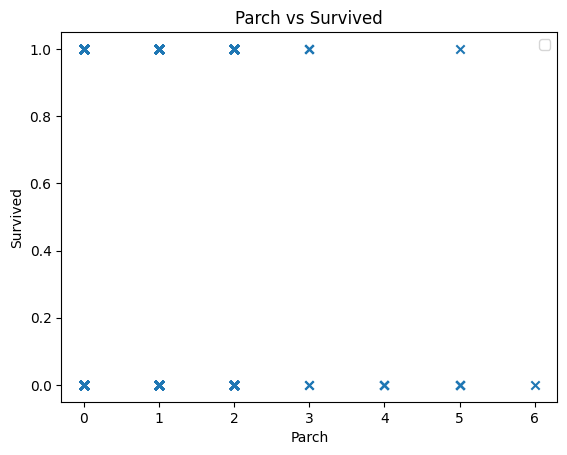

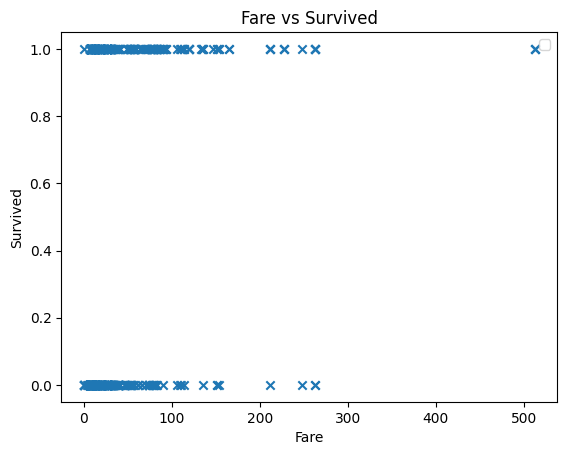

In [ ]:
for column in df.columns:
    if df[column].dtype == 'int64' or df[column].dtype == 'float64':
        plt.scatter(df[column], df['Survived'], marker='x')
        plt.title(column + ' vs Survived')
        plt.ylabel('Survived')
        plt.xlabel(column)
        plt.legend()
        plt.show()

## Sigmoid function

In [ ]:
input_array = x_train
exp_array = np.exp(input_array)

In [ ]:
def sigmoid(z):
    """
    Compute the sigmoid of z
    Args:
        z (ndarray): A scalar, numpy array of any size.
    Returns:
        g (ndarray): sigmoid(z), with the same shape as z
    """
    g = 1/(1+np.exp(-z))

    return g

Text(0.5, 0, 'z')

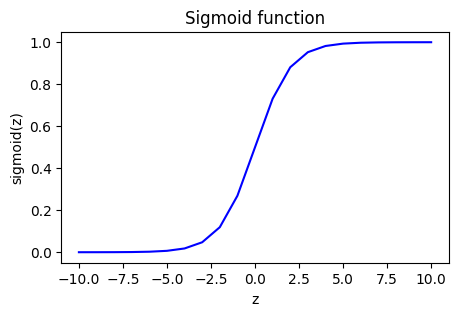

In [ ]:
# Generate an array of evenly spaced values between -10 and 10
z_tmp = np.arange(-10,11)
# Use the function implemented above to get the sigmoid values
y = sigmoid(z_tmp)
# Code for pretty printing the two arrays next to each other
np.set_printoptions(precision=3)

#draw sigmoid function
fig,ax = plt.subplots(1,1,figsize=(5,3))
ax.plot(z_tmp, y, c="b")
ax.set_title("Sigmoid function")
ax.set_ylabel('sigmoid(z)')
ax.set_xlabel('z')

## Cost function

In [ ]:
def compute_cost_logistic(X, y, w, b):
    """
    Computes cost
    Args:
      X (ndarray (m,n)): Data, m examples with n features
      y (ndarray (m,)) : target values
      w (ndarray (n,)) : model parameters
      b (scalar)       : model parameter

    Returns:
      cost (scalar): cost
    """
    m = X.shape[0]
    cost = 0.0

    for i in range(m):
        z_i = np.dot(X[i],w) + b
        f_wb_i = sigmoid(z_i)
        cost +=  -y[i]*np.log(f_wb_i) - (1-y[i])*np.log(1-f_wb_i)

    cost = cost / m

    return cost

## Gradient descent

In [ ]:
def compute_gradient_logistic(X, y, w, b):
    """
    Computes the gradient for logistic regression
    Args:
      X (ndarray (m,n): Data, m examples with n features
      y (ndarray (m,)): target values
      w (ndarray (n,)): model parameters
      b (scalar)      : model parameter
    Returns
      dj_dw (ndarray (n,)): The gradient of the cost w.r.t. the parameters w

      dj_db (scalar)      : The gradient of the cost w.r.t. the parameter b.

    """

    m,n = X.shape
    dj_dw = np.zeros((n,))                           #(n,)
    dj_db = 0.

    for i in range(m):
        f_wb_i = sigmoid(np.dot(X[i],w) + b)          #(n,)(n,)=scalar
        err_i  = f_wb_i  - y[i]                       #scalar
        for j in range(n):
            dj_dw[j] = dj_dw[j] + err_i * X[i,j]      #scalar
        dj_db = dj_db + err_i
    dj_dw = dj_dw/m                                   #(n,)
    dj_db = dj_db/m                                   #scalar

    return dj_db, dj_dw

### Batch gradient descent

In [ ]:
import math
import copy

In [ ]:
def gradient_descent(X, y, w_in, b_in, alpha, num_iters):
    """
    Performs batch gradient descent

    Args:
      X (ndarray (m,n)   : Data, m examples with n features
      y (ndarray (m,))   : target values
      w_in (ndarray (n,)): Initial values of model parameters
      b_in (scalar)      : Initial values of model parameter
      alpha (float)      : Learning rate
      num_iters (scalar) : number of iterations to run gradient descent

    Returns:
      w (ndarray (n,))   : Updated values of parameters
      b (scalar)         : Updated value of parameter
    """
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    w = copy.deepcopy(w_in)  #avoid modifying global w within function
    b = b_in

    for i in range(num_iters):
        # Calculate the gradient and update the parameters
        dj_db, dj_dw = compute_gradient_logistic(X, y, w, b)

        # Update Parameters using w, b, alpha and gradient
        w = w - alpha * dj_dw
        b = b - alpha * dj_db

       # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion
            J_history.append( compute_cost_logistic(X, y, w, b) )

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]}   ")

    return w, b, J_history         #return final w,b and J history for graphing

In [ ]:
w_tmp  = np.zeros_like(x_train[0])
b_tmp  = 0.
alph = 0.05
iters = 10000

w_out, b_out, _ = gradient_descent(x_train, y_train, w_tmp, b_tmp, alph, iters)
print(f"\nupdated parameters: w:{w_out}, b:{b_out}")

Iteration    0: Cost [1.976]   
Iteration 1000: Cost [1.37]   
Iteration 2000: Cost [0.975]   
Iteration 3000: Cost [1.635]   
Iteration 4000: Cost [0.822]   
Iteration 5000: Cost [1.305]   
Iteration 6000: Cost [1.004]   
Iteration 7000: Cost [6.031]   
Iteration 8000: Cost [7.033]   
Iteration 9000: Cost [6.548]   

updated parameters: w:[0.346], b:[0.896]


##Predict

In [ ]:
def predict (x,w,b):
  """
  x: ndarray shape (m,n) data, m examples by n features
  w: ndarray shape (n,) values of parameters of model
  b: scaler - value of bias parameter of model
  returns p - ndarray (m,) the predictions for x using a threshold 0.5
  """
  #number of training examples
  m, n = x.shape
  p=np.zeros(m)

  #loop over each example
  for i in range(m):
    z_wb=np.dot(x[i],w)
    #loop over each feature
    for j in range(n):
      #add the corresponding term to z_wb
      z_wb +=0
      #add bias term
      z_wb +=b
      #calculate the prediciton for this example
      f_wb=sigmoid(z_wb)
      #apply threshold
      p[i] = 1 if f_wb>0.8 else 0

  return p

In [ ]:
y_pred = predict(x_train,0.346,0.896)

In [ ]:
y_pred

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

In [ ]:
print('Train Accuracy: %f'%(np.mean(y_pred == y_train) * 100))

Train Accuracy: 40.984237
